## DTSC 710 Machine Learning Assignment 1

Submitted by: Gail Elaine Goveas (1306196)

## Part 1

In [1]:
#importing modules

import pandas as pd
import numpy as np
import time

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut


In [2]:
#Loading the dataframe

df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
#Dropping target data so as to scale only the features and not the label

df_outcome = df["Outcome"]
df.drop("Outcome", axis = 1, inplace = True)


In [5]:
#Scale data using standard scaler

df = (df - df.mean())/df.std()

In [6]:
#Concating the target to scaled features 

df = pd.concat([df, df_outcome], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


In [7]:
#Splitting data into training and testing set

diabetes_features = df.drop("Outcome", axis = 1)

diabetes_target = df["Outcome"]

diabetes_training_data, diabetes_test_data, diabetes_training_target, diabetes_test_target = train_test_split(diabetes_features, diabetes_target, test_size=0.20,random_state=42)



In [8]:
#Determining the K value, and creating a visualization of the accuracy
K = []
scores = []

for k in range(1, 26):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(diabetes_training_data, diabetes_training_target)

    diabetes_pred = clf.predict(diabetes_test_data)
    
    K.append(k)
    scores.append(accuracy_score(diabetes_test_target, diabetes_pred))
    
    
#acc_df = pd.DataFrame(list(zip(K, scores)),columns =['K_Value', 'Accuracy_Score'])
#acc_df

Text(0, 0.5, 'Accuracy score')

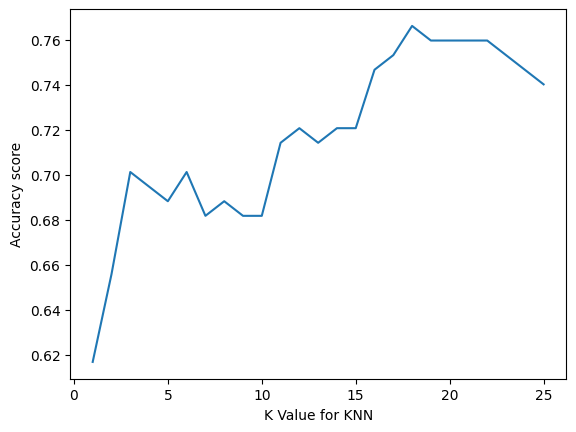

In [9]:
#mapping K values and accuracy score

plt.plot(K, scores)
plt.xlabel("K Value for KNN")
plt.ylabel("Accuracy score")

The best k value for the given data set is 18 as it gives us the highest accuracy score of 76.6%.

For the cross_val_score function below, I have used the X and y representing the features and target label of the entire dataset. The cross_val_score function automatically splits the dataset into training and testing data set for each fold of validation.


In [10]:
#Run 5 fold cross validations - report mean and standard deviation

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

clf = KNeighborsClassifier(n_neighbors = 18)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X , y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("\nAverage CV Score: ", scores.mean())
print("\nStandard Deviation is ", scores.std())


Cross Validation Scores:  [0.75974026 0.66233766 0.77272727 0.83006536 0.75163399]

Average CV Score:  0.7553009082420847

Standard Deviation is  0.05397910816303026


In [11]:
#Evaluate using confusion matrix

clf = KNeighborsClassifier(n_neighbors = 18)
clf.fit(diabetes_training_data, diabetes_training_target)

diabetes_pred = clf.predict(diabetes_test_data)

conf_mat = confusion_matrix(diabetes_test_target, diabetes_pred)
acc = (conf_mat[0][0] + conf_mat[1][1])/ conf_mat.sum()

#using skleran
#acc = accuracy_score(diabetes_test_target, diabetes_pred)

print("Confusion matrix:\n" , conf_mat)
print("\nAccuracy is:" , acc)

Confusion matrix:
 [[89 10]
 [26 29]]

Accuracy is: 0.7662337662337663


For the K Nearest Neighbour model, I have set the number of neighbours value to 18 as this provides the highest accuracy between 1 to 25.

The average accuracy of the model using 5- fold cross-validation method was 75.53%, and the accuracy obtained using confusion matrix is 76.62%. 

## Part 2

In [21]:
#importing modules 

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


Since features with negative values cannot be used for MultinomialNB, 
I have created a different dataframe for part 2 where the features are not scaled. 

In [22]:
df_1 = pd.read_csv('diabetes.csv')
df_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
#Splitting data into training and testing set

nb_features = df_1.drop("Outcome", axis = 1)

nb_target = df_1["Outcome"]

nb_training_data, nb_test_data, nb_training_target, nb_test_target = train_test_split(nb_features, nb_target, test_size=0.20,random_state=42)



In [24]:
#Training three classifiers using GaussianNB, MultinomialNB, and BernoulliNB

clf1 = GaussianNB()
clf1.fit(nb_training_data, nb_training_target)

clf2 = MultinomialNB()
clf2.fit(nb_training_data, nb_training_target)


clf3 = BernoulliNB(force_alpha=True)
clf3.fit(nb_training_data, nb_training_target)

BernoulliNB(force_alpha=True)

Again, I have not split the data into training and validation set as the cross_val_score function does this. But instead of using the entire dataset I am only using the training set so that the model is not exposed to the test set. 

In [25]:
#Run 5 fold cross validations with training set and validation set 

k_folds = KFold(n_splits = 5)

scores_gaus = cross_val_score(clf1, nb_training_data , nb_training_target, cv = k_folds)
scores_multinomial = cross_val_score(clf2, nb_training_data , nb_training_target, cv = k_folds)
scores_bernoulli = cross_val_score(clf3, nb_training_data , nb_training_target, cv = k_folds)

print("Gaussian Cross Validation Scores: ", scores_gaus, '\nwith mean',scores_gaus.mean(), '\nand standard deviation', scores_gaus.std() )
print("\nMultinomial Cross Validation Scores: ", scores_multinomial, '\nwith mean',scores_multinomial.mean(), '\nand standard deviation', scores_multinomial.std() )
print("\nBernoulli Cross Validation Scores: ", scores_bernoulli, '\nwith mean',scores_bernoulli.mean(), '\nand standard deviation', scores_bernoulli.std() )



Gaussian Cross Validation Scores:  [0.72357724 0.76422764 0.75609756 0.73170732 0.75409836] 
with mean 0.7459416233506597 
and standard deviation 0.01553599193880559

Multinomial Cross Validation Scores:  [0.55284553 0.57723577 0.64227642 0.58536585 0.64754098] 
with mean 0.601052912168466 
and standard deviation 0.0374107214840887

Bernoulli Cross Validation Scores:  [0.71544715 0.6097561  0.60162602 0.67479675 0.6147541 ] 
with mean 0.6432760229241636 
and standard deviation 0.04443880504324385


In [26]:
#Use test set (holdout set) for final testing.

#Gaussian NB

acc1 = clf1.score(nb_test_data, nb_test_target)

print("The accuracy for Gaussian NB model is:", acc1)

#Multinomial NB

acc2 = clf2.score(nb_test_data, nb_test_target)

print("\nThe accuracy for Multinomial NB model is:", acc2)

#Bernoulli NB

acc3 = clf3.score(nb_test_data, nb_test_target)

print("\nThe accuracy for Bernoulli NB model is:", acc3)

The accuracy for Gaussian NB model is: 0.7662337662337663

The accuracy for Multinomial NB model is: 0.6623376623376623

The accuracy for Bernoulli NB model is: 0.6558441558441559


Using the k-fold method on the training and validation sets, it can be observed that among the three Naive Bayes classifiers used, the Multinomial classifier has the lowest average accuracy of 60.10% followed by the Bernoulli classifier with an average accuracy of 64.32%. The Gaussian model had a significantly higher average accuracy compared to the other two models of 74.59%. 



However, when we use the holdout set for the final testing, the Bernoulli classifer had a higher accuracy score compared to the Multinomial model.  The accuracy for the Bernoulli and Multinomial classifiers are 65.58% and 66.23% respectively. The Gaussian model had the highest accuracy of 76.62%.


Based on the above metrics, it can be said that the Gaussian NB model is the best NB model for the given dataset

## Part 3

In [19]:
# Retraining KNN and Gaussian NB using leave-one-out cross validation 

loo_cv = LeaveOneOut()

#KNN
t1 = time.time()
knn_scores = cross_val_score(clf, X, y, cv = loo_cv)
t2 = time.time()

#Gaussian
t3 = time.time()
gaussian_scores = cross_val_score(clf1, X, y, cv = loo_cv)
t4 = time.time()

In [20]:
#Mean and standard deviation

print("Mean of KNN model is:", knn_scores.mean(), "with standard deviation:", knn_scores.std())
print("\nMean of Gaussian NB model is:", gaussian_scores.mean(), "with standard deviation:", gaussian_scores.std())

Mean of KNN model is: 0.7473958333333334 with standard deviation: 0.43450581313637865

Mean of Gaussian NB model is: 0.75390625 with standard deviation: 0.4307338113161509


In [21]:
#Model Run time

print("KNN Model run time is", round(t2 - t1, 4), "seconds")
print("\nGaussian Model run time is", round(t4 - t3, 4), "seconds")

KNN Model run time is 3.9504 seconds

Gaussuian Model run time is 3.303 seconds


The accuracy of the model for both KNN and Gaussian were higher using k-fold cross validation 
compared to the Leave one out classigication method. 

So in the previous section we noticed that the accuracy for KNN was 75.53% while using K-fold method and is 74.73% using the leave one out method.

Similarly the accuracy for the Gaussian model was 76.62% using K-fold and is 75.39% using Leave one out method. 

## Part 4

While evaluating the accuracy for KNN model using confusion matrix we got a accuracy of 76.62% and the Gaussian model also provided an accuracy of 76.6%.

So if we take the leave one out method into consideration, the Gaussian model had a better performance than the KNN model. It also had a lower runtime. Taking these into consideration, the Gaussian model would be a better fit. 

In [23]:
#Selecting Gaussian, and retraining the classifier with all the data available


clf1.fit(diabetes_training_data, diabetes_training_target)

diabetes_pred_1 = clf1.predict(diabetes_test_data)
    

mat_gaus = confusion_matrix(diabetes_test_target, diabetes_pred_1)
acc_gaus = accuracy_score(diabetes_test_target, diabetes_pred_1)

print("The confusion matrix is\n", mat_gaus)
print("\nThe accuracy is", acc_gaus)
print("\nThe classification report is as follows\n", classification_report(diabetes_test_target, diabetes_pred_1))

The confusion matrix is
 [[79 20]
 [16 39]]

The accuracy is 0.7662337662337663

The classification report is as follows
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

